# Seaborn 101
Reference: 

https://elitedatascience.com/python-seaborn-tutorial#step-2

There are two ways to plot charts. Both similar. 

    1. (recommended, used in the examples below) Pass your DataFrame to the 'data=' argument, while passing column names to the axes arguments, x= and y=.
    2. Directly pass in Series of data to the axes arguments.

There are many types of charts that you can do. 

    1. Scatter: sns.lmplot(x =, y=, data=)
    2. Boxplot: sns.boxplot(data=)
    3. Heatmap: sns.heatmap(corr)
    4. Histogram: sns.distplot(df.col_name)
    5. Bar: sns.countplot(x=, data=)
    6. Factor Plot: sns.factorplot(x=, y=, data=, hue=, col=, kind = 'swarm')
    7. Density Plot: sns.kdeplot(df['col1'], df['col2'])
    8. Joint Distribution Plot: sns.jointplot(x='col1', y='col2', data=df)
    9. Line plot: sns.lineplot(x =, y =, color =, data =)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
# %matplotlib inline

In [97]:
### Pokemon Dataset
df = pd.read_excel('test.xlsx', sheet_name = 'Pokemon')
display(df.head(1))

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


(0, 155.59142850764817)

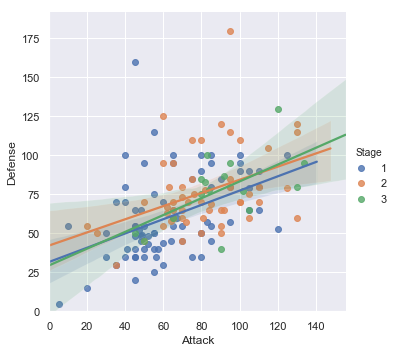

In [62]:
# scatter plot with / without regression line
sns.lmplot(x = 'Attack', y = 'Defense', data = df, 
           fit_reg = True, hue = 'Stage') # with regression line, # color by 'Stage'
plt.ylim(0, None)
plt.xlim(0, None)

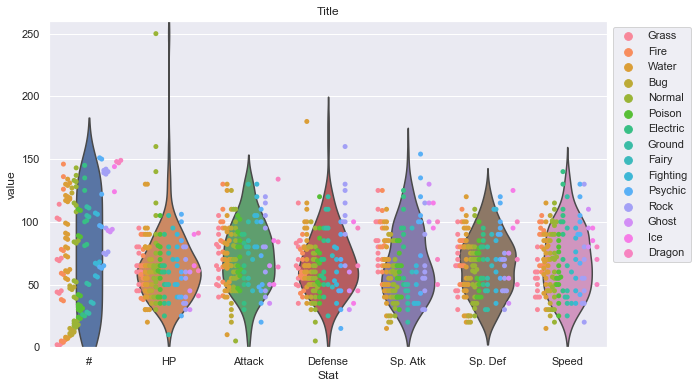

In [59]:
# violin plot and Swarm plot
df = pd.read_excel('test.xlsx', sheet_name = 'Pokemon')
df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
df = pd.melt(df, id_vars=["Name", "Type 1", "Type 2"], var_name="Stat")

plt.figure(figsize=(10,6))
plt.title('Title')
plt.ylim(0, 260)

sns.violinplot(x='Stat', y='value', data=df,  # violin plot.
               inner = None) # Remove the bars inside the violins
sns.swarmplot(x='Stat', y='value', data=df,  # swarm plot
              hue='Type 1', dodge=True) # dodge: Separate points by hue
plt.legend(bbox_to_anchor=(1, 1), loc=2)

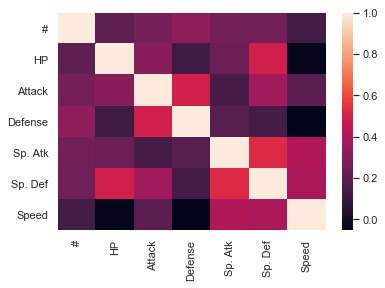

In [64]:
# heatmap / heat map
df = pd.read_excel('test.xlsx', sheet_name = 'Pokemon')
df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
corr = df.corr()
sns.heatmap(corr)

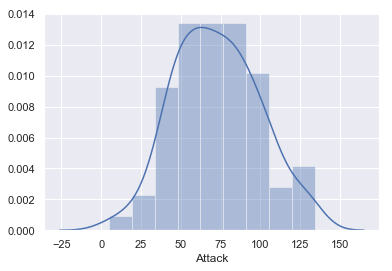

In [65]:
# Distribution Plot / Histogram
sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

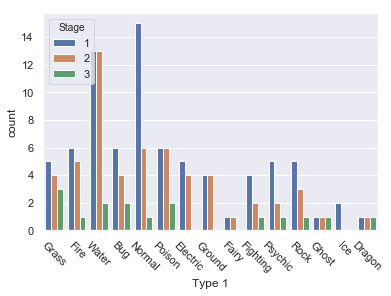

In [70]:
# bar chart / bar plot
sns.countplot(x='Type 1', data=df,  hue = 'Stage')
plt.xticks(rotation=-45)# Rotate x-labels 45 degree

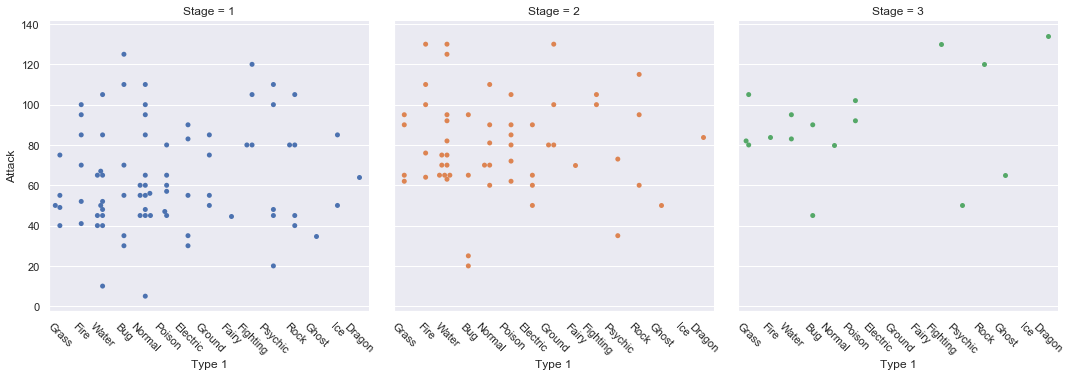

In [73]:
# factor plot / catplot / swarm plot
g = sns.catplot(x='Type 1', y='Attack', data=df, hue='Stage',col='Stage',kind='swarm') 
g.set_xticklabels(rotation=-45)
# plt.xticks(rotation=-45)

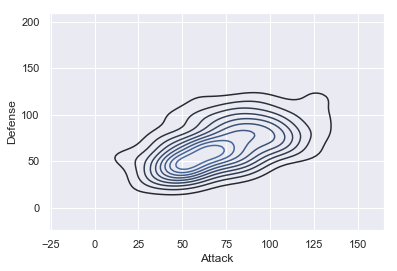

In [76]:
# Density Plot
sns.kdeplot(df['Attack'], df['Defense'])

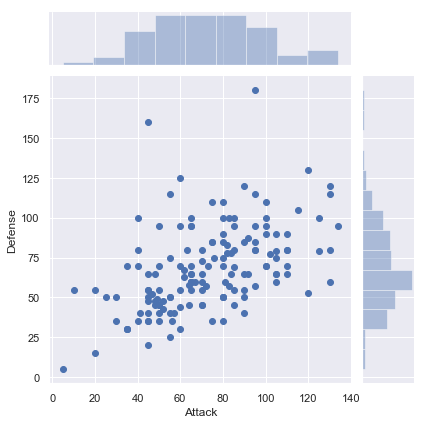

In [77]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


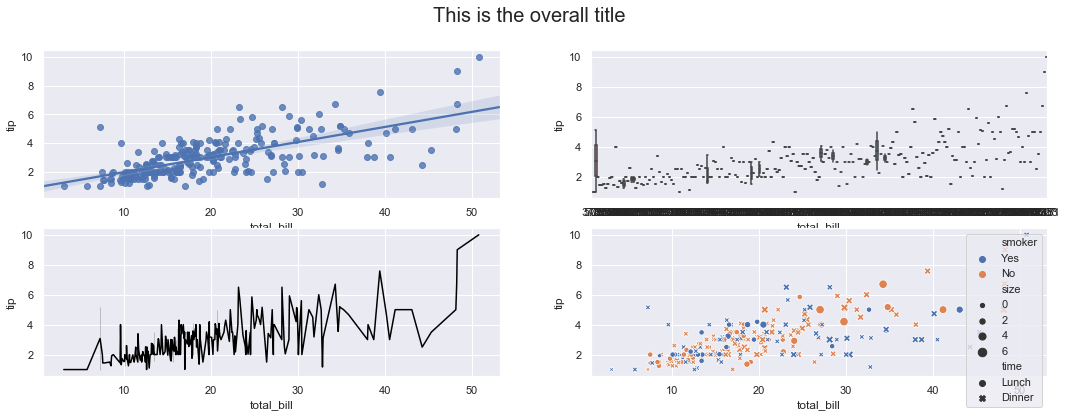

In [98]:
# use tips dataset
df = sns.load_dataset('tips')
display(df.head(1))

fig = plt.figure(figsize = (18, 6))
plt.suptitle('This is the overall title', fontsize=20)

ax1 = fig.add_subplot(221)
ax1 = sns.regplot(x='total_bill', y='tip', data=df, ax=ax1)

ax2 = fig.add_subplot(222)
ax2 = sns.boxplot(x='total_bill', y='tip', data=df, ax=ax2)

ax3 = fig.add_subplot(223)
# ax3 = sns.scatterplot(x = 'total_bill', y = 'tip', hue="smoker", style = 'time', data = df, ax = ax3)
ax3 = sns.lineplot(x = 'total_bill', y = 'tip', color = 'black', data = df, ax = ax3)

ax4 = fig.add_subplot(224)
ax4 = sns.scatterplot(x = 'total_bill', y = 'tip', hue="smoker", style = 'time', size = 'size', data = df, ax = ax4)